<a href="https://colab.research.google.com/github/sletz17/Underwater_plastic_detection/blob/main/Underwater_plastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import keras.utils as image
#from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
# def limitgpu(maxmem):
# 	gpus = tf.config.list_physical_devices('GPU')
# 	if gpus:
# 		# Restrict TensorFlow to only allocate a fraction of GPU memory
# 		try:
# 			for gpu in gpus:
# 				tf.config.experimental.set_virtual_device_configuration(gpu,
# 						[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=maxmem)])
# 		except RuntimeError as e:
# 			# Virtual devices must be set before GPUs have been initialized
# 			print(e)


# # 1.5GB
# limitgpu(512) 

In [ ]:
# def limitgpu(maxmem):
# 	gpus = tf.config.list_physical_devices('GPU')
# 	if gpus:
# 		# Restrict TensorFlow to only allocate a fraction of GPU memory
# 		try:
# 			for gpu in gpus:
# 				tf.config.experimental.set_virtual_device_configuration(gpu,
# 						[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=maxmem)])
# 		except RuntimeError as e:
# 			# Virtual devices must be set before GPUs have been initialized
# 			print(e)

(416, 416, 3)

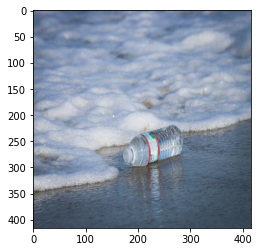

In [ ]:
img = image.load_img("/content/drive/MyDrive/Plastic_Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg")
plt.imshow(img)
cv2.imread("/content/drive/MyDrive/Plastic_Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg").shape

In [ ]:
training = "/content/drive/MyDrive/Plastic_Dataset/train"
training_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,rotation_range=30,fill_mode='nearest')
validation = "/content/drive/MyDrive/Plastic_Dataset/valid"
validation_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.listdir(training)

['Not_Plastic', 'Underwater_Plastic']

In [ ]:
train_generator = training_datagen.flow_from_directory(training,target_size=(416,416),class_mode='categorical',batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation, target_size=(416,416), class_mode='categorical', batch_size= 16)

Found 2192 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [ ]:
model_plastic = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(416,416, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_plastic.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=0.0001),
metrics=['acc'])


In [ ]:
history = model_plastic.fit(train_generator,steps_per_epoch = 15,epochs = 50,
                            validation_data = validation_generator,validation_steps = 15)

Epoch 1/50
15/15 [==============================] - 463s 31s/step - loss: 14.1459 - acc: 0.9621 - val_loss: 5.3833 - val_acc: 0.9667
Epoch 2/50
15/15 [==============================] - 427s 28s/step - loss: 0.8358 - acc: 0.9978 - val_loss: 6.2384 - val_acc: 0.9583
Epoch 3/50
15/15 [==============================] - 422s 28s/step - loss: 0.2200 - acc: 0.9989 - val_loss: 0.7857 - val_acc: 0.9625
Epoch 4/50
15/15 [==============================] - 420s 28s/step - loss: 0.0968 - acc: 0.9957 - val_loss: 0.4845 - val_acc: 0.9500
Epoch 5/50
15/15 [==============================] - 422s 28s/step - loss: 0.0096 - acc: 0.9989 - val_loss: 0.5428 - val_acc: 0.9500
Epoch 6/50
15/15 [==============================] - 408s 27s/step - loss: 0.0306 - acc: 0.9978 - val_loss: 0.3476 - val_acc: 0.9583
Epoch 7/50
15/15 [==============================] - 429s 28s/step - loss: 0.0148 - acc: 0.9989 - val_loss: 33.4086 - val_acc: 0.9375
Epoch 8/50
15/15 [==============================] - 440s 29s/step - loss: 

In [ ]:
model_plastic.save('plastic_detection.h5')